# Exercise 6

Collaborated with Hazel

In [ ]:
!apt update
!apt install ffmpeg libsm6 libxext6 -y
!pip install opencv-python
!pip install --upgrade pip

#import cv2
import PIL as pil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal 
from scipy.optimize import curve_fit
!pip install scikit-image
from skimage import exposure
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma
import os

Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [307 kB]
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [7,906 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [15.2 kB]
Fetched 8,467 kB in 2s (4,243 kB/s)



7 packages can be upgraded. Run 'apt list --upgradable' to see them.



libsm6 is already the newest version (2:1.2.3-1).
libsm6 set to manually installed.
libxext6 is already the newest version (2:1.3.3-1+b2).
libxext6 set to manually installed.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libasound2
  libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec58 libavdevice58
  libavfilter7 libavformat58 libavresample4 libavutil56

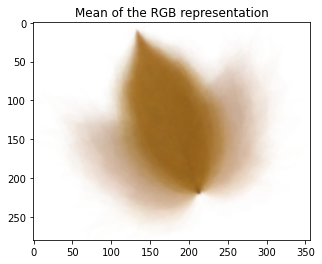

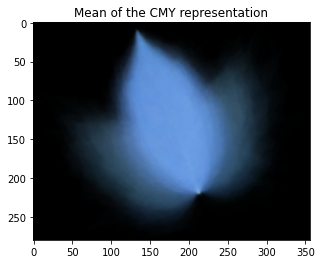

In [ ]:


import numpy as np
from numpy import append
import scipy.special as scp
import math
from math import cos
from math import exp
from math import pi
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy
from scipy import integrate
scipy.version.version
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')


from skimage import io
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


third_dimension = 3 #My RGBs
m=280
n=356
l = 143 #I have 143 images

big_matrix_leaves = np.empty([l,m, n , 3]) #every row is an image # rows are m 

sums = np.array([[[0 for k in range(third_dimension)] for j in range(n)] for i in range(m)])
for i in range(143):
    name = "/work/am205_leaves_356x280/main/leaf" + format(i, '03d') + ".png"
    a = io.imread(name)/255
    #use CMY
    a_cmy = np.ones((m, n, 3)) - a
    sums = sums + a
    big_matrix_leaves[i] = a_cmy

sums = sums/143

#Sums in the CMY: cyan, magenta and yellow representation.
cmy_mean = 1-sums

#plt.imshow(sums.astype(np.uint8))

plt.imshow(sums)
plt.title("Mean of the RGB representation")
plt.draw()
plt.savefig("graph_6a_rbg.jpeg", dpi=300, bbox_inches='tight')
plt.show()



#plt.imshow(rgb_mean.astype(np.uint8))

plt.imshow(cmy_mean)
plt.title("Mean of the CMY representation")
plt.draw()
plt.savefig("graph_6a_cmy.jpeg", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Exercise b
#centered matrix 
A = big_matrix_leaves - cmy_mean 
A = A.reshape(l, 3*m*n)
A = np.transpose(A)

u, s, v = np.linalg.svd(A, full_matrices= False)

d = np.empty(l)
c = np.empty(l)

for column in range(0, l): #we call now L as columns because we transposed this before
    d[column] = max(u[:, column])
    c[column] = min(u[:, column])

In [ ]:
u_positive = np.empty([n*m*3, l ])
u_negative = np.empty([n*m*3, l])

for row in range(0, u.shape[0]):
    for column in range(0, u.shape[1]):
        u_positive[row][column] = max(0, (u[row][column]/ d[column]))
        u_negative[row][column] = max(0, (u[row][column]/ c[column]))
print(u.shape)


(299040, 143)


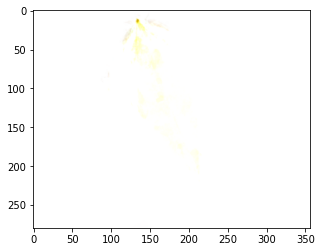

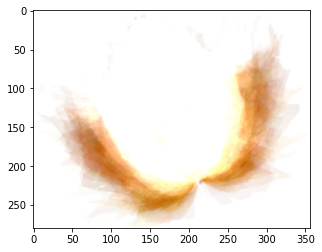

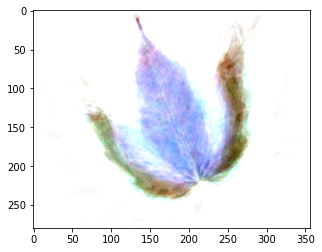

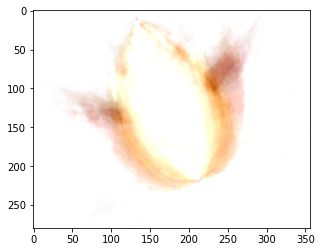

In [ ]:
u_positive_transposed = u_positive.T.reshape((l, m,n, 3))
#u_positive_transposed = u_positive.reshape((l, m,n, 3))

u_positive0 = np.ones((m, n, 3)) - u_positive_transposed[0]
u_positive1 = np.ones((m, n, 3)) - u_positive_transposed[1]
u_positive2 = np.ones((m, n, 3)) - u_positive_transposed[2]
u_positive3 = np.ones((m, n, 3)) - u_positive_transposed[3]

plt.imshow(u_positive0)
plt.draw()
plt.savefig("graph_6_positive0.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(u_positive1)
plt.draw()
plt.savefig("graph_6_positive1.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(u_positive2)
plt.draw()
plt.savefig("graph_6a_positive2.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(u_positive3)
plt.draw()
plt.savefig("graph_6a_positive3.jpeg", dpi=300, bbox_inches='tight')
plt.show()




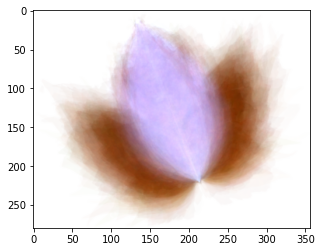

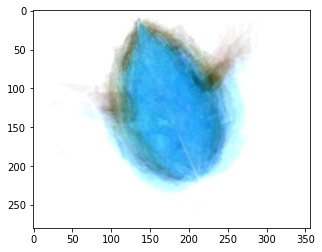

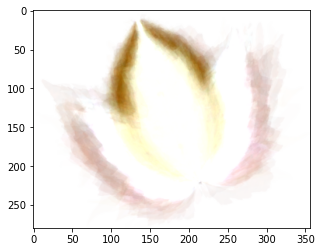

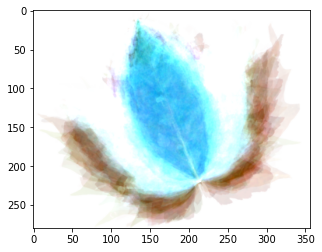

In [ ]:
u_negative_transposed = u_negative.T.reshape((l, m,n, 3))

u_negative0 = np.ones((m, n, 3)) - u_negative_transposed[0]
u_negative1 = np.ones((m, n, 3)) - u_negative_transposed[1]
u_negative2 = np.ones((m, n, 3)) - u_negative_transposed[2]
u_negative3 = np.ones((m, n, 3)) - u_negative_transposed[3]

plt.imshow(u_negative0)
plt.draw()
plt.savefig("graph_6_negative0.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(u_negative1)
plt.draw()
plt.savefig("graph_6_negative1.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(u_negative2)
plt.draw()
plt.savefig("graph_6_negative2.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(u_negative3)
plt.draw()
plt.savefig("graph_6_negative3.jpeg", dpi=300, bbox_inches='tight')
plt.show()




(280, 356, 3)
(280, 356, 3)
The rank of this reconstruction of the third image is k= 1


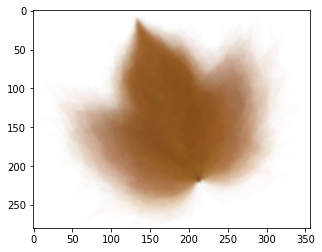

The rank of this reconstruction of the third image is k= 2


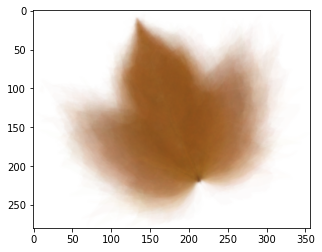

The rank of this reconstruction of the third image is k= 4


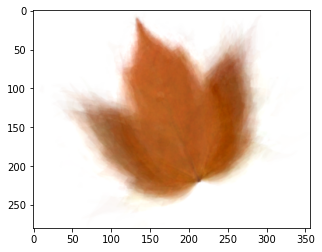

The rank of this reconstruction of the third image is k= 8


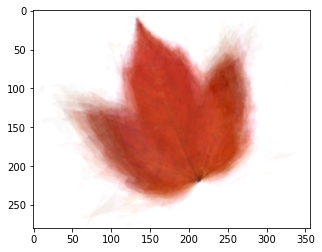

The rank of this reconstruction of the third image is k= 16


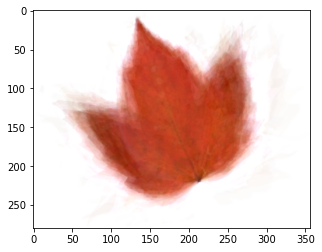

In [ ]:
#### 6c
print(cmy_mean.shape)

# Here I define a projection operator. This is rebuilding and re-constructing the image
# with k singular values, i.e. less than the total singular values we get.
# Each singular value has rank 1, hence we are recreating the image with a matrix of
# rank k, i.e. how many have been summed. 

# big_matrix_leaves contains all the 143 pictures on each column
# T is s_j, i.e. the jth column of the big matrix s
s_j = big_matrix_leaves[3]
print(s_j.shape)


#Rank values
k_values = [1,2,4,8,16]

reconstruction_list = []
def k_rank_image_reconstruction(k, s_j):
    reconstruction = np.copy(cmy_mean)
    first_parenthesis = s_j - reconstruction
    reconstruction = reconstruction.reshape((n*m*3))
    first_parenthesis = first_parenthesis.reshape((n*m*3))
    for j in range(0,k):
        reconstruction = reconstruction + np.dot(np.dot(np.transpose(u[:,j]), first_parenthesis), u[:,j])
        #reconstruction_list.append(reconstruction)
    return reconstruction

for k in k_values:
    print("The rank of this reconstruction of the third image is k=", k)
    image = k_rank_image_reconstruction(k, s_j)
    image_transposed = image.transpose().reshape(m,n,3)
    image_clip = (1,1,1) - image_transposed
    image_clip = np.clip(image_clip, 0,1)
    plt.imshow(image_clip)
    plt.title = ("The rank of this reconstruction of the third image is k=", k)
    #plt.title(title)
    #plt.draw()
    #name_file =str("graph_6_reconstruction_3_rank",k,".jpeg")
    #plt.savefig(name_file, dpi=300, bbox_inches='tight')
    plt.show()

The rank of this reconstruction of the tenth image is k= 1


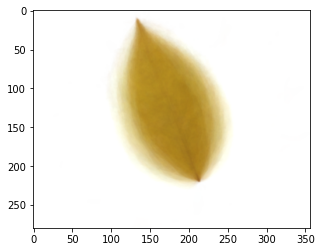

The rank of this reconstruction of the tenth image is k= 2


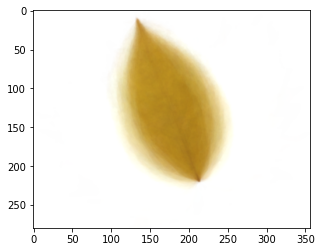

The rank of this reconstruction of the tenth image is k= 4


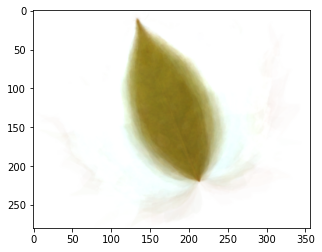

The rank of this reconstruction of the tenth image is k= 8


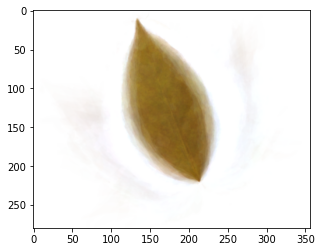

The rank of this reconstruction of the tenth image is k= 16


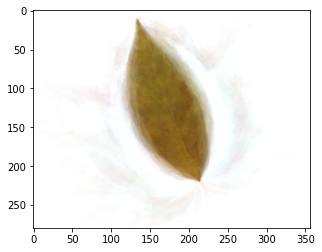

In [ ]:
s_j = big_matrix_leaves[10]

for k in k_values:
    print("The rank of this reconstruction of the tenth image is k=", k)
    image = k_rank_image_reconstruction(k, s_j)
    image_transposed = image.transpose().reshape(m,n,3)
    image_clip = (1,1,1) - image_transposed
    image_clip = np.clip(image_clip, 0,1)
    plt.imshow(image_clip)
    plt.show()

S_jlo, low distance


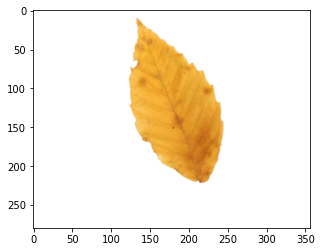

S_jlo reconstruction


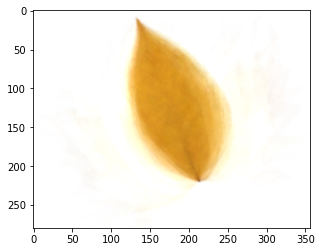

S_jhi, high distance


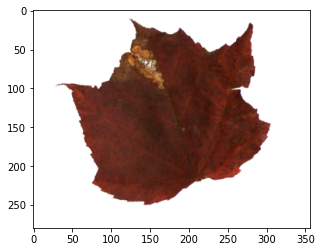

S_jhi reconstruction


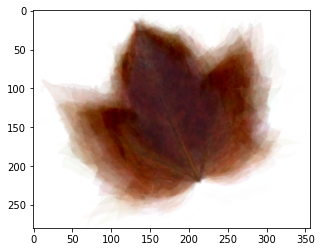

In [ ]:
# Problem d

distances_dictionary ={}

for j in range(0, l):
    #A selected image out of the many
    new_s_j = big_matrix_leaves[j]
    new_s_j_reshaped = new_s_j.reshape((n*m*3))
    #Here we are selecting the reconstruction of the image j with rank of 8
    p_eight = np.zeros((m, n, 3))
    p_eight = k_rank_image_reconstruction(8,new_s_j )
    inside_parenthesis = new_s_j_reshaped - p_eight
    inside_parenthesis.reshape((n*m*3))
    distance =(np.linalg.norm(inside_parenthesis, ord=2)**2)/(m*n)
    distances_dictionary[j] =distance

max_index = max(distances_dictionary, key = distances_dictionary.get)
min_index = min(distances_dictionary, key = distances_dictionary.get)

print("S_jlo, low distance") 
#this is the image with lowest distance to the reconstruction of itself 
#If this number is small, the reconstruction captures well the actual image

s_low_distance = np.ones((m,n,3)) - big_matrix_leaves[min_index]
plt.imshow(s_low_distance)
plt.show()

print("S_jlo reconstruction") 
reconstruction = k_rank_image_reconstruction(8, big_matrix_leaves[min_index])
reconstruction = reconstruction.reshape((m, n, 3))
image = (1,1,1) - reconstruction
image = np.clip(image, 0, 1)
plt.imshow(image)
plt.show()

print("S_jhi, high distance")
s_high_distance = np.ones((m,n,3)) - big_matrix_leaves[max_index]
plt.imshow(s_high_distance)
plt.show()

print("S_jhi reconstruction")
reconstruction = k_rank_image_reconstruction(8, big_matrix_leaves[max_index])
reconstruction = reconstruction.reshape((m, n, 3))
image = (1,1,1) - reconstruction
image = np.clip(image, 0, 1)
plt.imshow(image)
plt.show()

In [ ]:
############## 6e

additiona_leaves = np.empty([8,m,n,3])

for j, leaf in enumerate(range(143,151)):
    path = "./am205_leaves_356x280/extra/leaf" + str(leaf) + ".png"
    leaf_image = io.imread(path)/255
    additiona_leaves[j] = np.ones((m,n,3)) - leaf_image

print(additiona_leaves.shape)

additiona_leaves_distance_dict = {}
for j, leaf in enumerate(range(143,151)):
    print("This is the image number ", j)
    additional_s_j = np.copy(additiona_leaves[j])
    additional_s_j_reshaped = additional_s_j.reshape((m*n*3))
    reconstruction_add_sj = np.zeros((m,n,3))
    reconstruction_add_sj = k_rank_image_reconstruction(8, additional_s_j)
    add_inside_parenthesis = additional_s_j_reshaped - reconstruction_add_sj
    add_inside_parenthesis = add_inside_parenthesis.reshape((m*n*3))
    additional_img_distance = (np.linalg.norm(add_inside_parenthesis, ord=2)**2)/(m*n)
    print("This is its distance",additional_img_distance )
    additiona_leaves_distance_dict[j]=additional_img_distance





(8, 280, 356, 3)
This is the image number  0
This is its distance 0.01902441625316513
This is the image number  1
This is its distance 0.027016464827970304
This is the image number  2
This is its distance 0.03576926554078236
This is the image number  3
This is its distance 0.039154221211284305
This is the image number  4
This is its distance 0.024416462780224267
This is the image number  5
This is its distance 0.026360208971227653
This is the image number  6
This is its distance 0.04156199566682986
This is the image number  7
This is its distance 0.05338585919717463


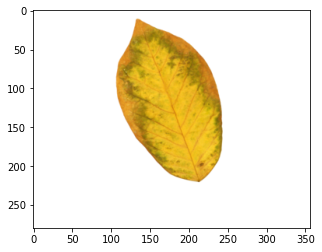

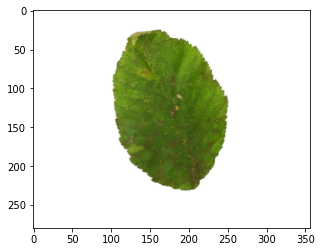

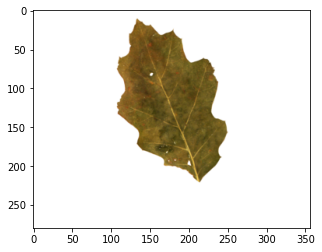

In [ ]:
#The leaves with the lowest distance are 0, 4 and 5. These are the ones
# that likely come from New Hampshire

plt.imshow(np.ones((m,n,3)) - additiona_leaves[0])
plt.draw()
plt.savefig("graph_6_newhamp1.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(np.ones((m,n,3)) - additiona_leaves[4])
plt.draw()
plt.savefig("graph_6_newhamp2.jpeg", dpi=300, bbox_inches='tight')
plt.show()


plt.imshow(np.ones((m,n,3)) - additiona_leaves[5])
plt.draw()
plt.savefig("graph_6_newhamp3.jpeg", dpi=300, bbox_inches='tight')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=332b37ac-474d-4b61-8755-5b4f9b2fadfe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>